In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the data and assign columns
results = pd.read_csv('results.csv',names=['result_id','race_id','driver_id','constructor_id','number','grid','position','position_text','position_order','points','laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'],header=None)
races=pd.read_csv('races.csv',names=['race_id','year','round','circuit_id','name','date','time','url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'],header=None)
drivers=pd.read_csv('drivers.csv',names= ['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'],header=None)
constructors=pd.read_csv('constructors.csv',names=['constructor_id','constructor_ref','name','nationality','url'],header=None)

In [3]:
results

,result_id,race_id,driver_id,constructor_id,number,grid,position,position_text,position_order,points,laps,time,milliseconds,fastest_lap,rank,fastest_lap_time,fastest_lap_speed,status_id
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,69,\N,\N,37,15,01:23.5,188.856,11
25656,25662,1086,848,3,23,17,17,17,17,0.0,69,\N,\N,43,12,01:23.0,189.911,11
25657,25663,1086,849,3,6,19,18,18,18,0.0,69,\N,\N,60,8,01:22.5,191.221,11
25658,25664,1086,852,213,22,16,19,19,19,0.0,68,\N,\N,58,16,01:23.5,188.795,12


In [4]:
#merge all datasets
df=pd.merge(results,races[['race_id','year','name','round']],on='race_id',how='left')
df=pd.merge(df,drivers[['driver_id','driver_ref','nationality']],on='driver_id',how='left')
constructors['constructor_id']=constructors['constructor_id'].astype(object)
#df.info()
#constructors.info()
df=pd.merge(df,constructors[['constructor_id','name','nationality']],on='constructor_id',how='left')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   result_id          25660 non-null  int64  
 1   race_id            25660 non-null  int64  
 2   driver_id          25660 non-null  int64  
 3   constructor_id     25660 non-null  object 
 4   number             25660 non-null  object 
 5   grid               25660 non-null  int64  
 6   position           25660 non-null  object 
 7   position_text      25660 non-null  object 
 8   position_order     25660 non-null  int64  
 9   points             25660 non-null  float64
 10  laps               25660 non-null  int64  
 11  time               25660 non-null  object 
 12  milliseconds       25660 non-null  object 
 13  fastest_lap        25660 non-null  object 
 14  rank               25660 non-null  object 
 15  fastest_lap_time   25660 non-null  object 
 16  fastest_lap_speed  256

In [6]:
#Drop columns that are not required
df.drop(['number','position','position_text','fastest_lap','status_id','result_id','race_id','driver_id','constructor_id'],axis=1,inplace=True)

In [7]:
df.drop(['laps'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               25660 non-null  int64  
 1   position_order     25660 non-null  int64  
 2   points             25660 non-null  float64
 3   time               25660 non-null  object 
 4   milliseconds       25660 non-null  object 
 5   rank               25660 non-null  object 
 6   fastest_lap_time   25660 non-null  object 
 7   fastest_lap_speed  25660 non-null  object 
 8   year               25660 non-null  int64  
 9   name_x             25660 non-null  object 
 10  round              25660 non-null  int64  
 11  driver_ref         25660 non-null  object 
 12  nationality_x      25660 non-null  object 
 13  name_y             25660 non-null  object 
 14  nationality_y      25660 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.1+ MB


In [9]:
#rename columns
df=df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','driver_ref':'driver','name_y':'constructor_name','nationality_y':'constructor_nationality'})

In [10]:
df.columns.tolist()

['grid',
 'position_order',
 'points',
 'time',
 'milliseconds',
 'fastest_lap_rank',
 'fastest_lap_time',
 'fastest_lap_speed',
 'year',
 'gp_name',
 'round',
 'driver',
 'driver_nationality',
 'constructor_name',
 'constructor_nationality']

In [11]:
#Rearranging columns
df=df[['year','gp_name','round','driver','constructor_name','grid','position_order','points','time','milliseconds','fastest_lap_rank','fastest_lap_time','fastest_lap_speed','driver_nationality','constructor_nationality']]

In [12]:
#Drop season 2019 since it is incomplete
df=df[df['year']!=2019]

In [13]:
#Sort values
df=df.sort_values(by=['year','round'],ascending=[False,True])

In [14]:
#Replace \N values in time column
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_time.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)

In [15]:
#change datatypes
df.fastest_lap_speed=df.fastest_lap_speed.astype(float)
df.fastest_lap_rank=df.fastest_lap_rank.astype(float)
df.milliseconds=df.milliseconds.astype(float)

In [16]:
#reset index

df.reset_index(drop=True, inplace=True)

In [17]:
#checking date of dataset shape

print(df.shape)

(25240, 15)


In [18]:
# info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25240 entries, 0 to 25239
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25240 non-null  int64  
 1   gp_name                  25240 non-null  object 
 2   round                    25240 non-null  int64  
 3   driver                   25240 non-null  object 
 4   constructor_name         25240 non-null  object 
 5   grid                     25240 non-null  int64  
 6   position_order           25240 non-null  int64  
 7   points                   25240 non-null  float64
 8   time                     6768 non-null   object 
 9   milliseconds             6767 non-null   float64
 10  fastest_lap_rank         6991 non-null   float64
 11  fastest_lap_time         6790 non-null   object 
 12  fastest_lap_speed        6790 non-null   float64
 13  driver_nationality       25240 non-null  object 
 14  constructor_nationalit

In [19]:
# head()

df.head(20)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,37:33.6,5853584.0,1.0,01:34.6,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,5.598,5859182.0,3.0,01:35.7,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,9.675,5863259.0,5.0,01:36.2,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,11.211,5864795.0,6.0,01:36.3,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,14.754,5868338.0,8.0,01:36.6,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,16.119,5869703.0,7.0,01:36.6,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,19.423,5873007.0,14.0,01:37.1,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,20.386,5873970.0,13.0,01:37.1,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,22.39,5875974.0,10.0,01:36.7,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,23.064,5876648.0,9.0,01:36.7,201.512,Chinese,Swiss


In [20]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], <a list of 0 Text major ticklabel objects>)

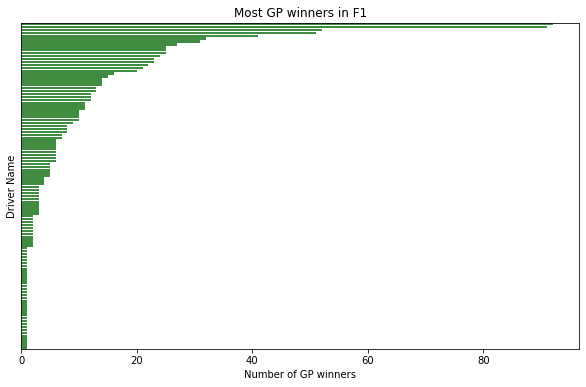

In [21]:
#GP winners dataframe

driver_winner=df.loc[df['position_order']==1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

#Creating a Bar Plot

sb.barplot(data=driver_winner,y='driver',x='position_order',color='green',alpha=0.8)
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP winners')
plt.yticks([])

In [22]:
# create new dataframe of top10 most GP winners
top10Drivers=driver_winner.head(10)

print(top10Drivers)

               driver  position_order
0            hamilton              92
1  michael_schumacher              91
2              vettel              52
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP wins')

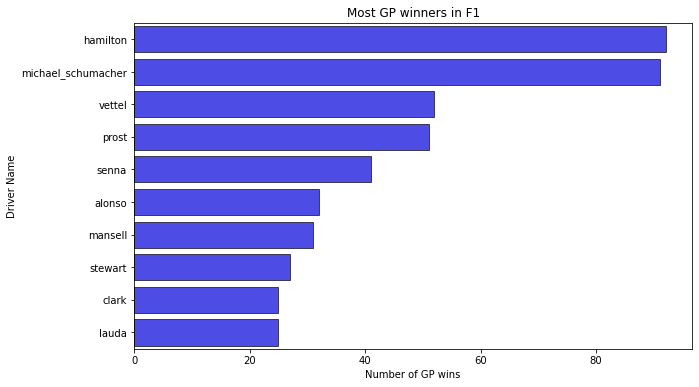

In [23]:
# Top 10 drivers plot

sb.barplot(data=top10Drivers,y='driver',x='position_order',color='blue',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

([], <a list of 0 Text major ticklabel objects>)

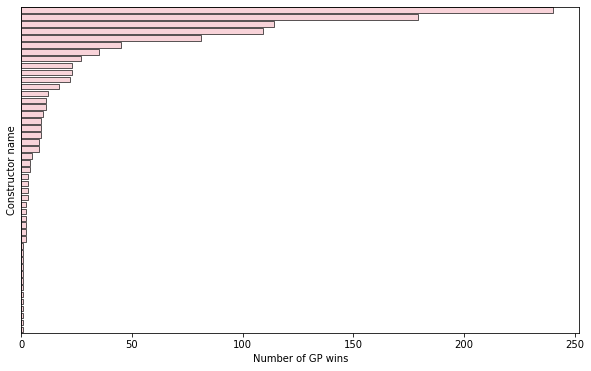

In [24]:
# GP constructor winners
constructor_winner = df.loc[df['position_order']==1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot for constructors winners

sb.barplot(data=constructor_winner,y='constructor_name',x='position_order',color='pink',alpha=0.8,linewidth=0.8,edgecolor="black")
plt.ylabel('Constructor name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [25]:
# Top 10 Constructor winners
top10Constructors=constructor_winner.head(10)
print(top10Constructors)

  constructor_name  position_order
0          Ferrari             240
1          McLaren             179
2         Williams             114
3         Mercedes             109
4         Red Bull              81
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

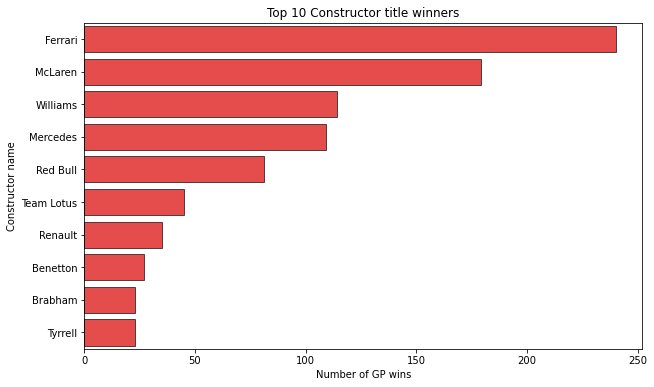

In [26]:
# Barplot of top 10 Constructors
sb.barplot(data=top10Constructors,y='constructor_name',x='position_order',color='red',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Top 10 Constructor title winners')
plt.ylabel('Constructor name')
plt.xlabel('Number of GP wins')

Text(0.5, 0, 'Starting position')

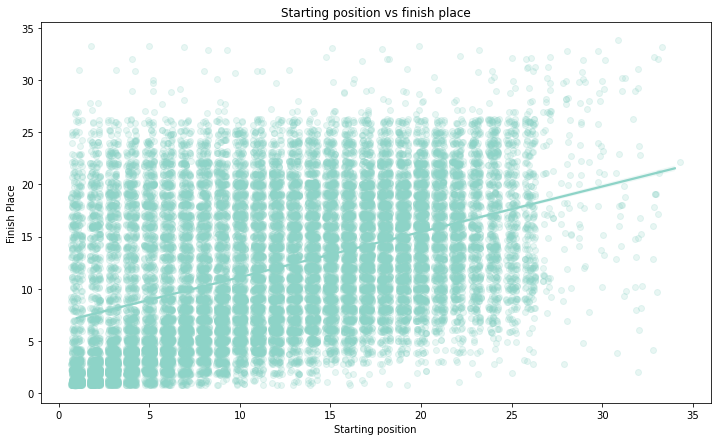

In [27]:
#removing the drivers who started from the pit lane
df_no_zero=df[df['grid']!=0]

#create a plot
plt.figure(figsize=[12,7])
sb.regplot(data=df_no_zero,x='grid',y='position_order',x_jitter=0.3,y_jitter=0.3,scatter_kws={'alpha':1/5})
plt.title('Starting position vs finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')

Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at indivual GPs')

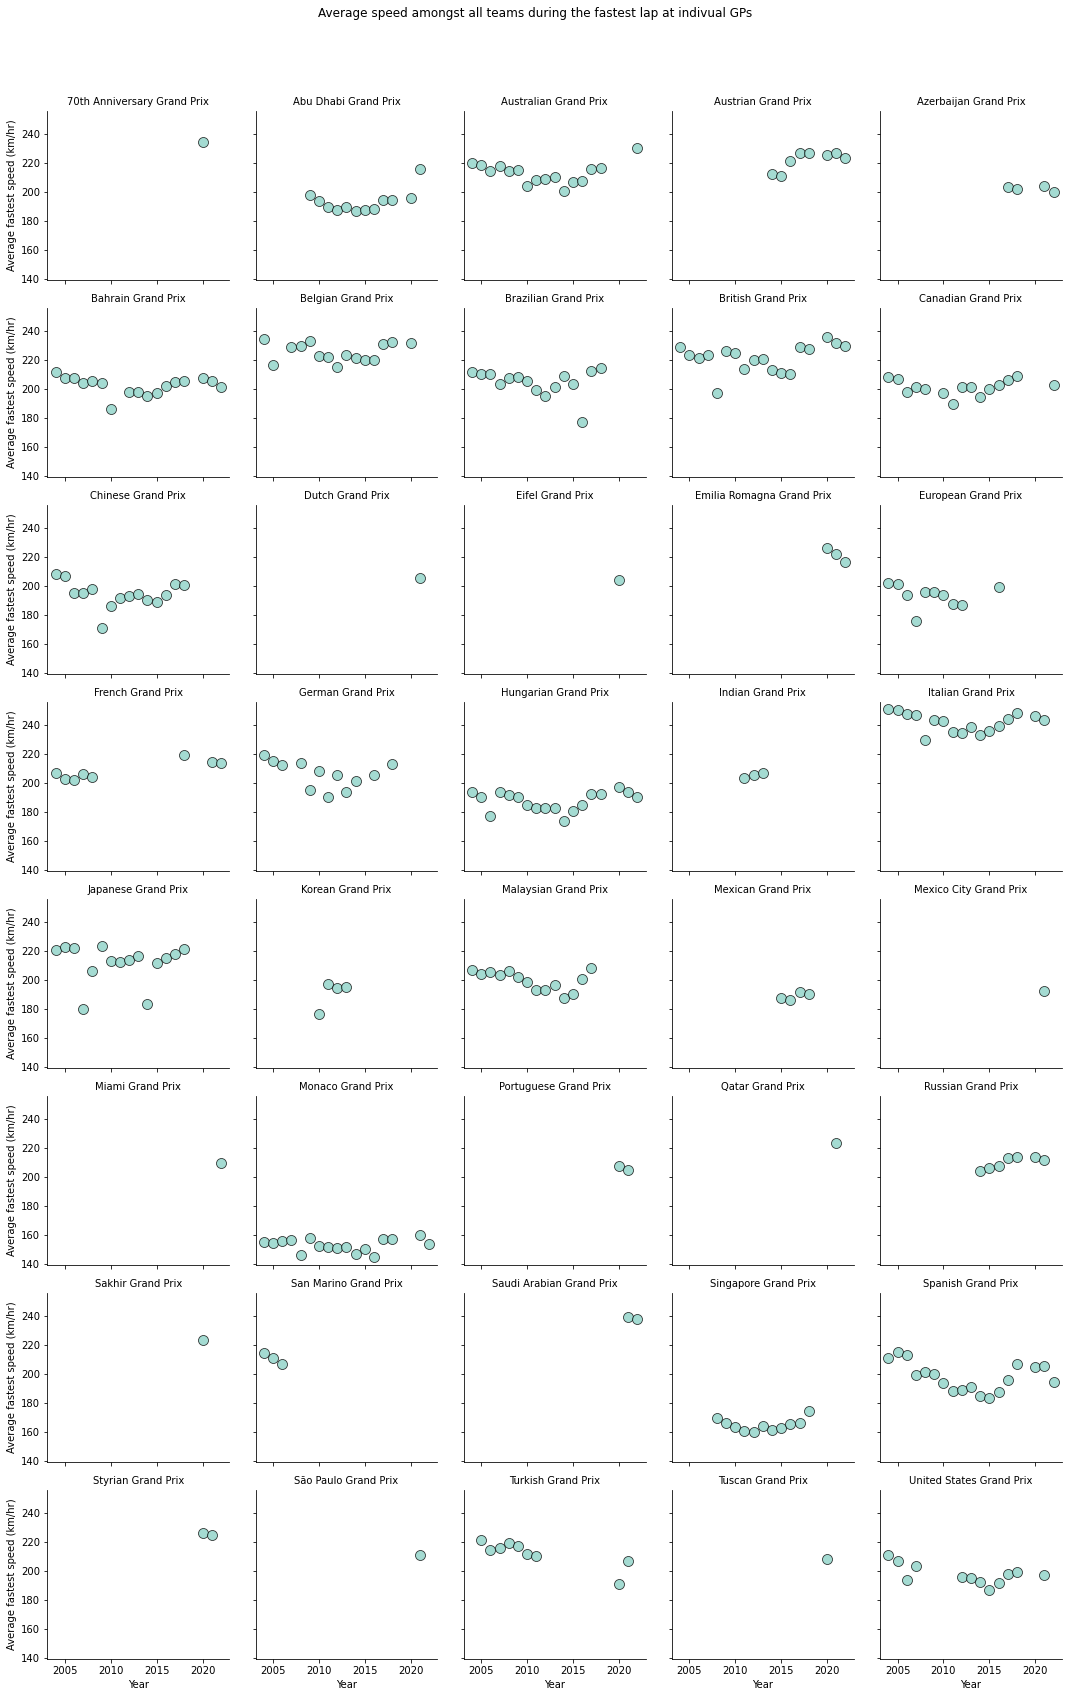

In [31]:
#create new data frame for seasons 2004 onwards
df_speed=df[df['year']>=2004]
df_group_speed=df_speed.groupby(['gp_name','year'])['fastest_lap_speed'].mean().to_frame().reset_index()

#creating facetgrid 
g=sb.FacetGrid(data=df_group_speed,col='gp_name',col_wrap=5)
g.map(plt.scatter,'year','fastest_lap_speed',alpha=0.8,linewidth=0.8,edgecolor="black",s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/hr)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at indivual GPs')


In [104]:
#Info on Sergio Perez Redbull Racing in Abu Dhabi

perez_abudhabi=df.loc[(df['driver']=='perez') & (df['gp_name']=='Abu Dhabi Grand Prix')].groupby(['year','grid','position_order'])['points'].max().sort_values(ascending=False).to_frame().reset_index()
print(perez_abudhabi)

   year  grid  position_order  points
0  2014    11               7    12.0
1  2015     4               5    10.0
2  2017     8               7     6.0
3  2016     8               8     4.0
4  2018    14               8     4.0
5  2013     8               9     2.0
6  2011    11              11     0.0
7  2012    11              15     0.0
8  2020    19              20     0.0
9  2021     4              15     0.0


In [105]:
#Info on Charles Leclerc Scuderia Ferrari in Abu Dhabi
leclerc_abudhabi=df.loc[(df['driver']=='leclerc') & (df['gp_name']=='Abu Dhabi Grand Prix')].groupby(['year','grid','position_order'])['points'].max().sort_values(ascending=False).to_frame().reset_index()
print(leclerc_abudhabi)

   year  grid  position_order  points
0  2018     8               7     6.0
1  2021     7              10     1.0
2  2020    12              13     0.0


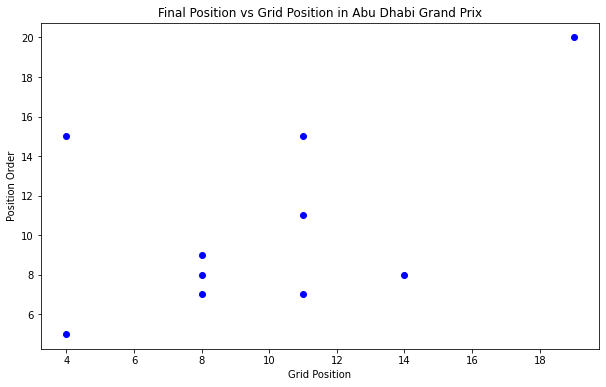

In [113]:
#Scatter plot for Sergio perez
plt.scatter(perez_abudhabi['grid'],perez_abudhabi['position_order'],color='blue')
plt.title('Final Position vs Grid Position in Abu Dhabi Grand Prix')
plt.ylabel('Position Order')
plt.xlabel('Grid Position')
plt.show()

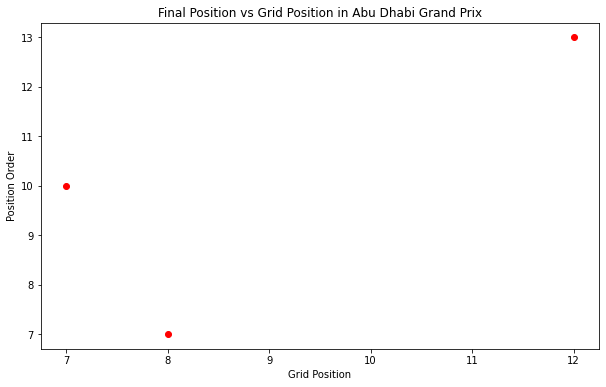

In [115]:
#Scatter plot for Charles Leclerc
plt.scatter(leclerc_abudhabi['grid'],leclerc_abudhabi['position_order'],color='red')
plt.title('Final Position vs Grid Position in Abu Dhabi Grand Prix')
plt.ylabel('Position Order')
plt.xlabel('Grid Position')
plt.show()